In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'karachi_real_estate_data.csv'  # Replace with your actual file path
dataset = pd.read_csv(file_path)

# Data Cleaning
dataset_cleaned = dataset.drop(columns=['House ID', 'Unnamed: 10'])  # Drop unnecessary columns

# One-hot encode categorical columns
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=['Location', 'Property Type'], drop_first=True)

# Define features (X) and target variable (y)
X = dataset_encoded.drop(columns=['Price ($)'])
y = dataset_encoded['Price ($)']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 49464715470.85632
R² Score: -0.5939362375429071


Dataset Overview:

   House ID  Bathrooms  Price ($)  Year Built  Condition Rating  \
0      4001          1     500000        2010                 4   
1      4002          2     750000        2015                 5   
2      4003          2     400000        2008                 3   
3      4004          2     650000        2012                 4   
4      4005          1     300000        2005                 2   

   Distance to City Center (km)  Property Type  
0                             5      Apartment  
1                            10  Single Family  
2                             8      Townhouse  
3                             7  Single Family  
4                             6      Apartment  

Model Evaluation Metrics:
Mean Squared Error (MSE): 2055111111.11
R² Score (Accuracy): nan


C:\Users\ABDUL RAFAY\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


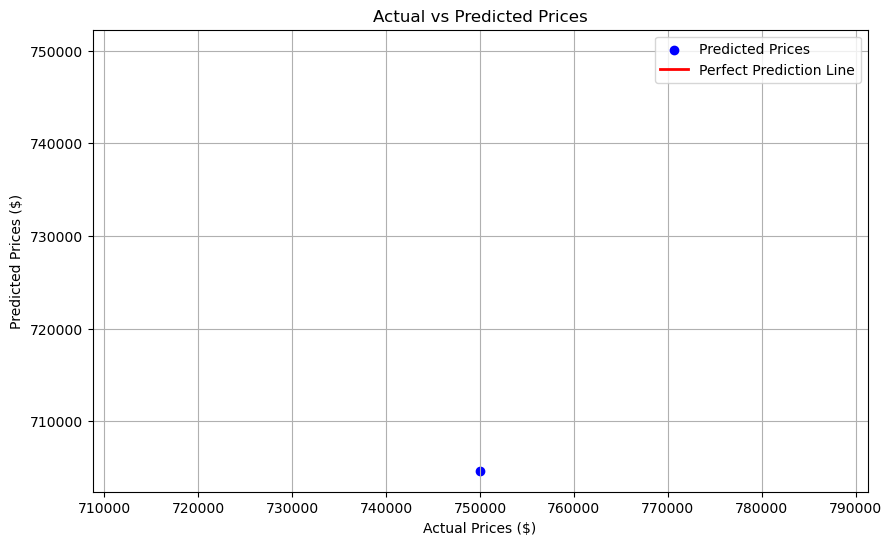

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'karachi_real_estate_data.csv'  # Replace with your actual file path
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Overview:\n")
print(df.head())

# Select features (X) and target variable (y)
# For linear regression, we'll only use numerical features
X = df[["Bathrooms", "Year Built", "Condition Rating", "Distance to City Center (km)"]]
y = df["Price ($)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2:.2f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()
